# La Estacionariedad: El Pilar de las Series de Tiempo 🧱

---

## **# 1. Definición y Fundamento de la Estacionariedad**

La **Estacionariedad** (*Stationarity*) es la propiedad de una serie de tiempo donde sus **propiedades estadísticas no cambian con el tiempo**.

En términos sencillos: si tomas una porción de la serie en el año 2000 y otra en el año 2020, ambas porciones deben tener la misma media, la misma varianza y la misma estructura de correlación.

### **¿Por qué es Crucial? (El Paradigma del Pronóstico)**

La mayoría de los modelos estadísticos de series de tiempo (incluyendo ARIMA, la base del pronóstico lineal) se basan en la idea de que la historia se repetirá.

* Si una serie es **No Estacionaria**, las reglas que describen el pasado (la media, la varianza) cambian constantemente.
* Si una serie es **Estacionaria**, las reglas son constantes, permitiendo que el modelo aprenda y proyecte esos patrones futuros de manera confiable.

Si modelas una serie no estacionaria sin transformarla, tu pronóstico simplemente extrapolará la tendencia o el ciclo actual de forma lineal, lo que casi siempre resulta en predicciones erróneas a largo plazo.

---

## **# 2. Tipos de Estacionariedad**

Como científicos de datos, generalmente nos centramos en el concepto más flexible y aplicable: la Estacionariedad en sentido amplio.

### **A. Estacionariedad Estricta (Strict Stationarity)**

Una serie es estrictamente estacionaria si la **distribución de probabilidad conjunta** de cualquier conjunto de observaciones no cambia a medida que se desplaza en el tiempo.
* Es muy restrictiva y difícil de probar en la práctica.

### **B. Estacionariedad Débil o en Sentido Amplio (Weak-Sense Stationarity)**

Una serie es estacionaria en sentido amplio si cumple tres condiciones fundamentales:

| Propiedad | Descripción | Fórmula |
| :--- | :--- | :--- |
| **Media Constante** | La media de la serie es constante y finita a lo largo del tiempo. | $$E[Y_t] = \mu$$ |
| **Varianza Constante** | La varianza de la serie es constante y finita a lo largo del tiempo (Homoscedasticidad). | $$\text{Var}[Y_t] = \sigma^2$$ |
| **Autocovarianza Constante** | La covarianza entre dos puntos de la serie solo depende de la distancia temporal ($k$) que los separa, no de la ubicación en el tiempo ($t$). | $$\text{Cov}[Y_t, Y_{t-k}] = \gamma_k$$ |

**Conclusión:** La mayoría de los modelos de series de tiempo (como ARIMA) requieren que los datos sean estacionarios en sentido amplio.

---

## **# 3. Causas de la No Estacionariedad (Raíces Unitarias)**

La no estacionariedad ocurre principalmente por la presencia de patrones sistemáticos que rompen las tres reglas anteriores:

| Causa Principal | Propiedad Rota | Solución Clásica |
| :--- | :--- | :--- |
| **Tendencia** ($T_t$) | Media Constante (la media aumenta/disminuye) | **Diferenciación Simple** |
| **Estacionalidad** ($S_t$) | Media Constante (media varía por ciclos) | **Diferenciación Estacional** |
| **Heteroscedasticidad** | Varianza Constante (la varianza cambia con el tiempo) | **Transformación Logarítmica o de Box-Cox** |

### **La Raíz Unitaria (Unit Root)**

El término clave detrás de la no estacionariedad es la **Raíz Unitaria**.

* Una serie con una Raíz Unitaria es una serie que **integra** choques o perturbaciones.
* El modelo de **Paseo Aleatorio** (*Random Walk*) es el ejemplo canónico de una serie no estacionaria.

$$
Y_t = Y_{t-1} + \epsilon_t
$$

Donde $Y_{t-1}$ es el valor anterior y $\epsilon_t$ es ruido blanco. La influencia de cada choque ($\epsilon_t$) se mantiene permanentemente en el nivel de $Y_t$.

---

## **# 4. Transformando la Serie a Estacionaria (Diferenciación)**

La técnica más importante para lograr la estacionariedad es la **Diferenciación**, que convierte la serie $Y_t$ en una nueva serie $Z_t$ que es libre de tendencia y/o estacionalidad.

### **Ejemplo en Python: Eliminando la Tendencia (Diferencia de Orden 1)**

C:\Users\delhy.py\AppData\Local\Temp\ipykernel_4880\2031727898.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fechas = pd.date_range('2023-01-01', periods=100, freq='M')


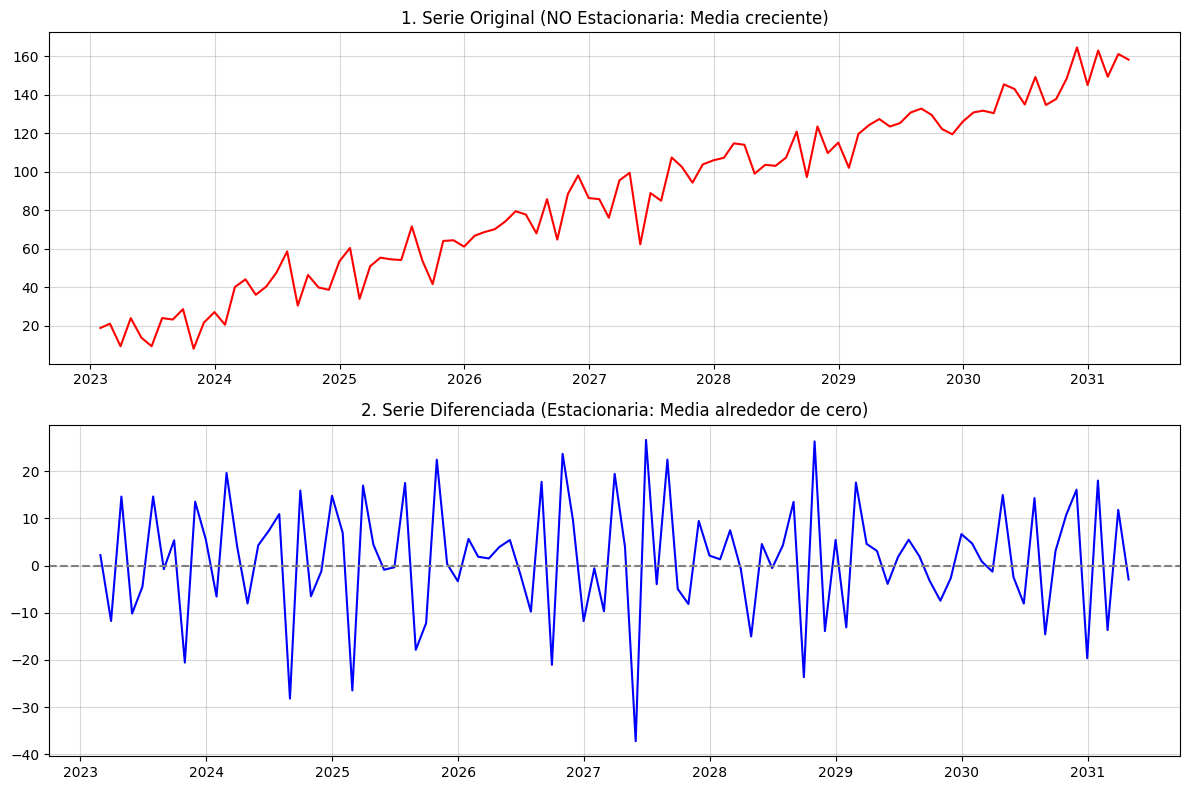

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Crear Serie NO Estacionaria (con Tendencia)
fechas = pd.date_range('2023-01-01', periods=100, freq='M')
valores_no_estacionario = [10 + i * 1.5 + np.random.normal(0, 10) for i in range(len(fechas))]
serie_no_estacionaria = pd.Series(valores_no_estacionario, index=fechas)

# 2. Aplicar Diferenciación
serie_estacionaria_transformada = serie_no_estacionaria.diff(periods=1).dropna()

# 3. Visualizar la Transformación
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(serie_no_estacionaria, color='red')
plt.title('1. Serie Original (NO Estacionaria: Media creciente)')
plt.grid(True, alpha=0.5)

plt.subplot(2, 1, 2)
plt.plot(serie_estacionaria_transformada, color='blue')
plt.axhline(0, color='gray', linestyle='--')
plt.title('2. Serie Diferenciada (Estacionaria: Media alrededor de cero)')
plt.grid(True, alpha=0.5)

plt.tight_layout()
plt.show()

**Observación:**

 La serie original tiene una media que cambia con el tiempo (tendencia), mientras que la serie diferenciada oscila alrededor de una media constante de cero, lo que la hace estacionaria en media.

## Diferenciación Estacional

Si la serie tiene estacionalidad con periodo $s$ (ej., $s=12$ para datos mensuales), se aplica:$$Z_t = Y_t - Y_{t-s}$$

In [2]:
# Ejemplo de código para diferenciación estacional (asumiendo s=12)
serie_doble_diferenciada = serie_no_estacionaria.diff(periods=1).diff(periods=12).dropna()

**Nota Importante:** Una serie puede necesitar una diferencia de orden 1 (para tendencia) y una diferencia de orden $s$ (para estacionalidad) para volverse completamente estacionaria.